# References
DataCamp :: Preparing for machine learning interview questions in python
        

In [1]:
# imports
import os
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import boxcox, zscore
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
import re
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LarsCV
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier, AdaBoostClassifier, 
RandomForestClassifier, GradientBoostingClassifier)
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression, Ridge, RidgeCV, LinearRegression
from sklearn.metrics import (mean_squared_error, silhouette_score, confusion_matrix, accuracy_score, precision_score, 
recall_score, f1_score, r2_score)
from xgboost import XGBClassifier
from sklearn.decomposition import PCA, TruncatedSVD 
import matplotlib.axes as ax
from sklearn.manifold import TSNE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [2]:
# settings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)

In [3]:
# getting help
#help(plt.hist)
#help(plt.legend)

In [4]:
# Binder upload
# 1. goto mybinder.com
# 2. add the github repository link, branch, filename, requirements.txt should be filled with dependencies
# 3. remove path from read_csv
# 4. share the link

# Data preparation

In [5]:
# general path for data

#path = 'e:/PycharmProjects/DataQuiz/data'

path = os.path.abspath(os.getcwd())
datadir = 'data'
full_path = os.path.join(path, datadir)
path = full_path

file1= path+'/loan_missing_filled.csv'
filePCA = path+'/loan_data_PCA.csv'
filedr5 = path+'/loan_data_dr_5.csv'
filedr12 = path+'/loan_data_dr_12.csv'
filedr19 = path+'/loan_data_dr_19.csv'
filedr25 = path+'/loan_data_dr_25.csv'
filedr31 = path+'/loan_data_dr_31.csv'
#file2= path+'/loan_data.csv'
#file3= path+'/loan_data_all.txt'
out_filename= path+'/temp.csv'
#dffile = path+'/df.csv'
#dffile1 = path+'/df1.csv'
file_diabetes = path+'/diabetes.csv'

# chapter1 e:: x1
# Read the file into a DataFrame: df
loan_data = pd.read_csv(file1)
diabetes = pd.read_csv(file_diabetes)
loan_data_PCA = pd.read_csv(filePCA, delimiter = ' ', skipinitialspace=True)
loan_data_dr5 = pd.read_csv(filedr5, delimiter = ' ', skipinitialspace=True)
loan_data_dr12 = pd.read_csv(filedr12, delimiter = ' ', skipinitialspace=True)
loan_data_dr19 = pd.read_csv(filedr19, delimiter = ' ', skipinitialspace=True)
loan_data_dr25 = pd.read_csv(filedr25, delimiter = ' ', skipinitialspace=True)
loan_data_dr31 = pd.read_csv(filedr31, delimiter = ' ', skipinitialspace=True)

In [6]:
# CHAPTER 3 :: prepar data PCA
print(len(loan_data_PCA.columns))
print(loan_data_PCA.columns)
loan_data_PCA = loan_data_PCA[['principal_component_1', 'principal_component_2', 'Loan_Status']]
print(loan_data_PCA.head)

4
Index(['id', 'principal_component_1', 'principal_component_2', 'Loan_Status'], dtype='object')
<bound method NDFrame.head of      principal_component_1  principal_component_2  Loan_Status
0                 1.672383               0.074079            1
1                 1.092726              -0.233041            1
2                -1.916015              -1.385713            1
3                 0.288960               0.434018            1
4                 0.063865              -0.124051            0
5                -0.913066              -0.762487            0
6                -0.471160              -0.525604            1
7                -0.217500              -0.332292            0
8                 0.029196              -0.705842            0
9                -0.878962              -0.283447            1
10                0.570974               0.609841            0
11               -1.394746              -0.266825            1
12                1.069480              -0.487502     

In [7]:
# CHAPTER 3 :: prepar data for visualisation PCA
loan_data_dr5 = loan_data_dr5.loc[:, loan_data_dr5.columns != 'ID']
loan_data_dr12 = loan_data_dr12.loc[:, loan_data_dr12.columns != 'ID']
loan_data_dr19 = loan_data_dr19.loc[:, loan_data_dr19.columns != 'ID']
loan_data_dr25 = loan_data_dr25.loc[:, loan_data_dr25.columns != 'ID']
loan_data_dr31 = loan_data_dr31.loc[:, loan_data_dr31.columns != 'ID']

loan_data_dr = pd.concat([loan_data_dr5, loan_data_dr12, loan_data_dr19, loan_data_dr25, loan_data_dr31], axis=1)
print(loan_data_dr5.columns)
print(loan_data_dr12.columns)
print(loan_data_dr19.columns)
print(loan_data_dr25.columns)
print(loan_data_dr31.columns)
print(loan_data_dr.columns)

Index(['Loan_Status', 'Current_Loan_Amount', 'Credit_Score',
       'Years_in_current_job', 'Years_of_Credit_History'],
      dtype='object')
Index(['Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens'],
      dtype='object')
Index(['Term_Long_Term', 'Term_Short_Term', 'Home_Ownership_Mortgage',
       'Home_Ownership_Own_Home', 'Home_Ownership_Rent',
       'Purpose_BusinessLoan'],
      dtype='object')
Index(['Purpose_DebtConsolidation', 'Purpose_EducationalExpenses',
       'Purpose_HomeImprovements', 'Purpose_HomePurchase',
       'Purpose_MajorPurchase'],
      dtype='object')
Index(['Purpose_Moving', 'Purpose_Other', 'Purpose_RenewableEnergyPurchase',
       'Purpose_Vacation', 'Purpose_Wedding'],
      dtype='object')
Index(['Loan_Status', 'Current_Loan_Amount', 'Credit_Score',
       'Years_in_current_job', 'Years_of_Credit_History',
       'Number_of_Open_Accounts', 'Number_of_Credit_

In [8]:
# CHAPTER 4 :: prepar data for model generalisation
loan_data_md = loan_data_dr

In [9]:
# CHAPTER 4 :: prepar data for model generalisation
loan_data_en = loan_data_dr

# Chapter 1: Pre-processing and Visualization

## Missing values

Questions about processing missing values are integral to any machine learning interview. If you are provided with a dataset with missing values, not addressing them will likely skew your results and lower your model's accuracy.

In this exercise, you'll practice the first pre-processing step by finding and exploring ways to handle missing values using pandas and numpy on a customer loan dataset.

In [10]:
#chapter 1 :: ex1
print(loan_data.isna().sum())

# Drop rows with missing values
dropNArows = loan_data.dropna(axis=0)

# Print percentage of rows remaining
print(dropNArows.shape[0]/loan_data.shape[0] * 100)

# Drop cols with missing values
dropNAcols = loan_data.dropna(axis=1)

# Print percentage of rows remaining
print(dropNAcols.shape[1]/loan_data.shape[1] * 100)

# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
print(loan_data['Credit Score'].describe())

# Examine 'Credit Score' after
print(loan_data_filled['Credit Score'].describe())

Current Loan Amount             0
Credit Score                    0
Years in current job            0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64
100.0
100.0
count    88910.000000
mean       721.198303
std         24.147875
min        585.000000
25%        713.273506
50%        725.000000
75%        739.000000
max        756.187745
Name: Credit Score, dtype: float64
count    88910.000000
mean       721.198303
std         24.147875
min        585.000000
25%        713.273506
50%        725.000000
75%        739.000000
max        756.187745
Name: Credit Score, dtype: float64


## Data Imputation

A more dynamic way of handling missing values is by imputing them. There are a variety of ways of doing this in python, but in this exercise you will be using the SimpleImputer() function from the sklearn.impute module on loan_data.

You will then use pandas and numpy to convert the imputed dataset into a DataFrame.

Note that 2 steps are now added to the pipeline, Instantiate and Fit: 

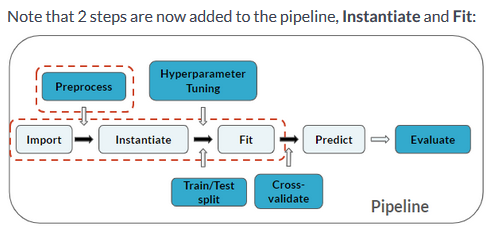

In [11]:
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)
# Check the DataFrame's info
print(loans_imp_meanDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

## Iterative imputation

In the previous exercise, you derived mean imputations for missing values of loan_data. However, in a machine learning interview, you will probably be asked about more dynamic imputation techniques that rely on other features in the dataset.

In this exercise, you'll practice a machine-learning based approach by imputing missing values as a function of remaining features using IterativeImputer() from sklearn.impute. This is a multivariate imputer that estimates each feature from all of the others in a 'round-robin' fashion. 

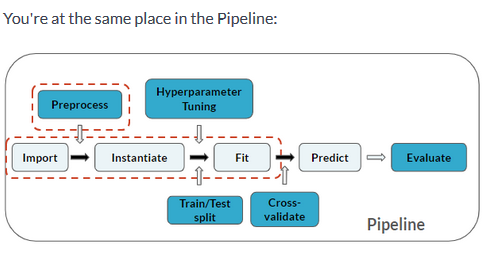

In [12]:
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_iterDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

## Data distributions and transformations

Train/test distributions

In a machine learning interview, you will most certainly work with training data and test data. As discussed earlier, poor model performance can result if the distributions of training and test datasets differ.

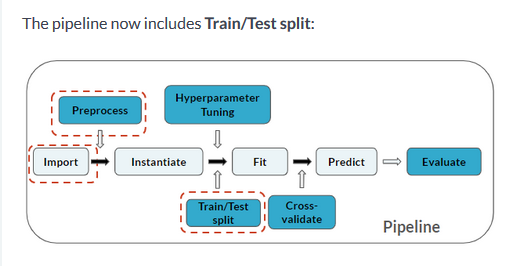

In [13]:


#dffile = path+'/loan_data_copied.csv'
#loan_data = pd.read_csv(dffile, delimiter=r"\s+", index_col=False, usecols=[0,5])
#print(loan_data.columns)
#out_filename = path+'/loan_data_output.csv'



In [14]:
'''
DataCamp non exixting df problem
Solution: print all rows in iPython shell
read the csv file 
for each row check for strings to concatenate and replace with new string
pandas csv to df
concatenate columns using lambda
''' 
    
dffile = path+'/loan_data_copied.csv'
out_filename = path+'/loan_data_output1.csv'
strings = ['Own','Home']
newstrings = 'OwnHome'

with open(dffile, 'r') as file, open(out_filename, 'w', newline='') as out_file:
        reader = csv.reader(file, delimiter = ' ', skipinitialspace=True)
        writer = csv.writer(out_file)
        # join row in string and look for a substring
        for row in reader:
           if ','.join(strings) in ','.join(row):
             # replace a substring with a new substring
             rowtostring = ','.join(row).replace(','.join(strings), newstrings) 
             writer.writerow(rowtostring.split(','))
           else:
             writer.writerow(row)
            
loan_data = pd.read_csv(out_filename, skiprows=1, names= ['Id', 'Term', 'Term1', 'Home_Ownership', 'Purpose', 'Credit_Score',
       'Annual_Income', 'Loan_Status', 'Loan_Status1'])  

loan_data['Term'] = loan_data[['Term', 'Term1']].apply(lambda x: ''.join(x), axis=1)
loan_data['Loan_Status'] = loan_data[['Loan_Status', 'Loan_Status1']].apply(lambda x: ''.join(x), axis=1)
loan_data = loan_data[['Term', 'Home_Ownership', 'Purpose', 'Credit_Score', 'Annual_Income', 'Loan_Status']]
print(loan_data.head())

        Term Home_Ownership            Purpose  Credit_Score  Annual_Income  \
0  ShortTerm           Rent  DebtConsolidation           709   130830.18220   
1  ShortTerm           Rent  DebtConsolidation           737    32239.61455   
2   LongTerm           Rent  DebtConsolidation           711   121718.55810   
3   LongTerm       Mortgage  DebtConsolidation           736    47380.05339   
4  ShortTerm           Rent  DebtConsolidation           710    74860.91777   

  Loan_Status  
0   FullyPaid  
1   FullyPaid  
2  ChargedOff  
3  ChargedOff  
4   FullyPaid  


<Figure size 432x288 with 0 Axes>

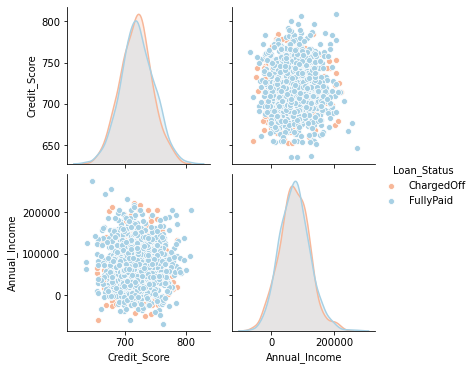

<Figure size 432x288 with 0 Axes>

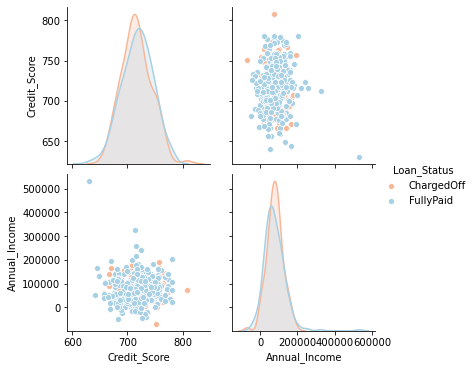

In [15]:
# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit_Score','Annual_Income','Loan_Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset , test_size=0.2, random_state=123)

# Examine pairplots
plt.figure()
sns.pairplot(trainingSet, hue='Loan_Status', palette='RdBu')
plt.show()

plt.figure()
sns.pairplot(testSet, hue='Loan_Status', palette='RdBu')
plt.show()

## Log and power distributions, BOXCOX transformation

In the last exercise, you compared the distributions of a training set and test set of loan_data. This is especially poignant in a machine learning interview because the distribution observed dictates whether or not you need to use techniques which nudge your feature distributions toward a normal distribution so that normality assumptions are not violated.
In this exercise, you will be using the log and power transformation from the scipy.stats module on the Years of Credit History feature of loan_data along with the distplot() function from seaborn, which plots both its distribution and kernel density estimation.

All relevant packages have been imported for you.

Here is where you are in the pipeline:

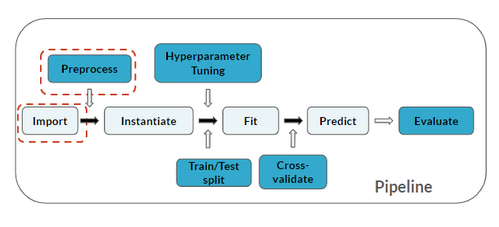

In [16]:
loan_data_all = pd.read_csv(file1)

In [17]:
print(loan_data_all.columns)

Index(['Current Loan Amount', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')


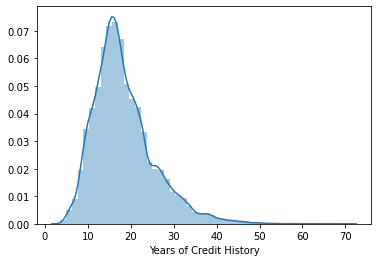

In [18]:
# Subset loan_data
cr_yrs = loan_data_all['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs)
plt.show()

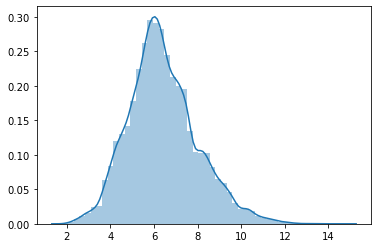

In [19]:
# Subset loan_data by applying boxcox transformation
cr_yrs = loan_data_all['Years of Credit History']

# Square root transform
cr_yrs_sqrt = boxcox(cr_yrs, lmbda=0.5)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_sqrt)
plt.show()

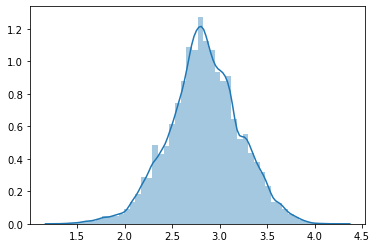

In [20]:
# Subset loan_data
cr_yrs = loan_data_all['Years of Credit History']

# root transform
cr_yrs_log = boxcox(cr_yrs, lmbda=0.0)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_log)
plt.show()

## Outlier detection

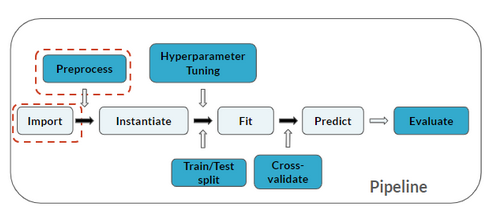

### Visualise outliers

In [21]:
# path = 'e:/PycharmProjects/DataQuiz/data'
file_status = path+'/loan_status.csv'

loan_status = pd.read_csv(file_status, names=['Loan_Status'], index_col = False)
loan_status['Loan_Status'] = loan_status[['Loan_Status']].apply(lambda x: re.sub(r'\s+', '', ''.join(x)), axis=1)

In [22]:
#path = 'e:/PycharmProjects/DataQuiz/data'
file_status = path+'/loan_status.csv'

loan_status = pd.read_csv(file_status, names=['Loan_Status'], index_col = False)

# remove spaces
loan_status['Loan_Status'] = loan_status[['Loan_Status']].apply(lambda x: re.sub(r'\s+', '', ''.join(x)), axis=1)
# remove leading digits
loan_status['Loan_Status'] = loan_status[['Loan_Status']].apply(lambda x: re.sub(r'^\d+', '', ''.join(x)), axis=1)

loan_data_all['Loan Status'] = loan_status['Loan_Status']

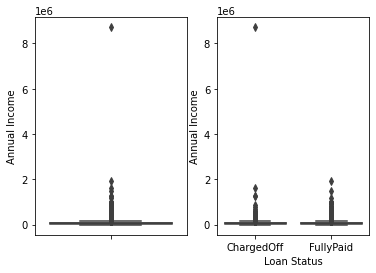

In [23]:
# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data_all['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data_all, ax=ax[1])
plt.show()

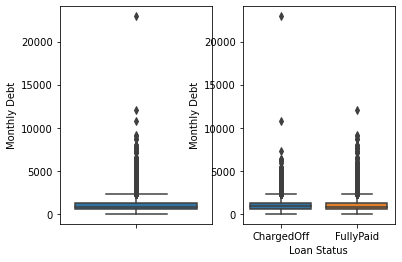

In [24]:
# Multivariate boxplot
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data_all['Monthly Debt'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Monthly Debt', data=loan_data_all, ax=ax[1])
plt.show()

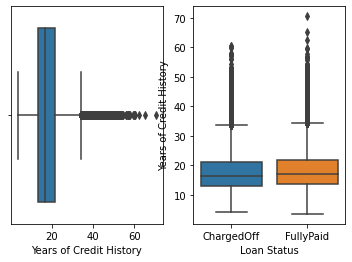

In [25]:
# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(x=loan_data_all['Years of Credit History'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Years of Credit History', data=loan_data_all, ax=ax[1])
plt.show()

### Handling Outliers

In the last exercise, you learned how visualizing outliers could come in handy in a machine learning interview. Another convenient way for handling outliers is by calculating the Z-score which gives a threshold for outliers approximately +/-3 standard deviations away from the mean.

In this exercise, you will use the scipy.stats module to calculate the Z-score using the stats.zscore() function and the mstats.winsorize() function to replace outliers using a technique called Winsorizing.

Recall from the video lesson that those points above and/or below 1.5 times the IQR should be suspected as possible outliers. For the last step in this exercise, that value is 2120.

In [26]:
numeric_cols = loan_data_all.select_dtypes(include=[np.number])
categoric_cols = loan_data_all.select_dtypes(exclude=[np.number])

In [27]:
# Print: before dropping
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# Create index of rows to keep
idx = (np.abs(zscore(numeric_cols)) < 3).all(axis=1)

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

# Print: after dropping
print(ld_out_drop.mean())
print(ld_out_drop.median())
print(ld_out_drop.max())

# Print: before winsorize
print((loan_data_all['Monthly Debt']).mean())
print((loan_data_all['Monthly Debt']).median())
print((loan_data_all['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = winsorize(loan_data_all['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

# Print: before replace with median
print((loan_data_all['Monthly Debt']).mean())
print((loan_data_all['Monthly Debt']).median())
print((loan_data_all['Monthly Debt']).max())

# Find median
median = loan_data_all.loc[loan_data_all['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data_all['Monthly Debt'] = np.where(loan_data_all['Monthly Debt'] > 2120, median, loan_data_all['Monthly Debt'])

print((loan_data_all['Monthly Debt']).mean())
print((loan_data_all['Monthly Debt']).median())
print((loan_data_all['Monthly Debt']).max())

Current Loan Amount             11937.624913
Credit Score                      721.198303
Years in current job                5.721263
Annual Income                   72749.391817
Monthly Debt                      963.102059
Years of Credit History            18.315313
Months since last delinquent       35.576659
Number of Open Accounts            11.110348
Number of Credit Problems           0.160477
Current Credit Balance          15435.932752
Maximum Open Credit             33568.124339
Bankruptcies                        0.112488
Tax Liens                           0.028221
dtype: float64
Current Loan Amount             10201.000000
Credit Score                      725.000000
Years in current job                6.000000
Annual Income                   64168.000000
Monthly Debt                      843.925000
Years of Credit History            17.000000
Months since last delinquent       35.663021
Number of Open Accounts            10.000000
Number of Credit Problems           0.00

## Z-Score standardization

In the last exercise, you calculated the Z-score to address outliers. In a machine learning interview, another question might be where else Z-scores are used. They are often used for scaling your data prior to creating a model.

In this exercise you'll use a function from  that was introduced in the video lesson to standardize the numeric feature columns in the loan_data dataset. Recall that this scales the data so that it has a mean of 0 and standard deviation of 1.

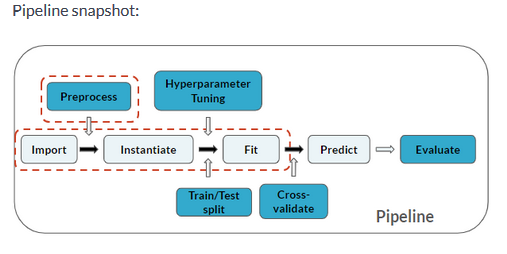

In [28]:
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([categoric_cols, numeric_cols_scaledDF], axis=1)
print(final_DF.head())

        Term Home_Ownership            Purpose Loan_Status  Credit_Score  \
0  ShortTerm           Rent  DebtConsolidation   FullyPaid     -0.398068   
1  ShortTerm           Rent  DebtConsolidation   FullyPaid      0.640786   
2   LongTerm           Rent  DebtConsolidation  ChargedOff     -0.323864   
3   LongTerm       Mortgage  DebtConsolidation  ChargedOff      0.603684   
4  ShortTerm           Rent  DebtConsolidation   FullyPaid     -0.360966   

   Annual_Income  
0       1.133952  
1      -0.883444  
2       0.947506  
3      -0.573635  
4      -0.011312  


# CHAPTER 2 :: Supervised learning

## Feature selection

Feature selection methods
* Filter: Rank features based on statistical performance
* Wrapper: Use an ML method to evaluate performance
* Embedded: Iterative model training to extract features
* Feature importance: tree-based ML models

### Regression: Filter and wrapper methods

Questions about reducing the dimensionality of a dataset are highly common in machine learning interviews. One way to reduce the dimensionality of a dataset is by only selecting relevant features in your dataset.

Here you'll practice a filter method on the diabetes DataFrame followed by 2 different styles of wrapper methods that include cross-validation. You will be using pandas, matplotlib.pyplot and seaborn to visualize correlations, process your data and apply feature selection techniques to your dataset.

The feature matrix with the dropped target variable column (progression) is loaded as X, while the target variable is loaded as y.

Note that pandas, matplotlib.pyplot, and seaborn have already been imported to your workspace and aliased as pd, sns and plt, respectively.

Notice you've added a Cross-validate step to your pipeline (which applies to the last 3 steps):

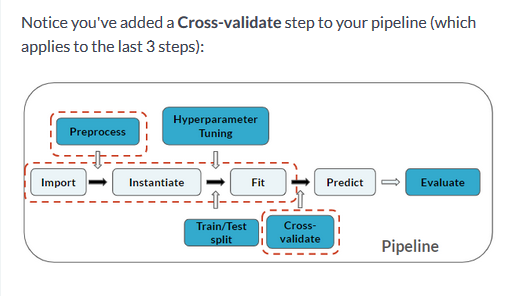

In [29]:
file_diabetes = path+'/diabetes.csv'
diabetes = pd.read_csv(file_diabetes)

In [30]:
print(diabetes.columns)


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')


In [31]:
X = diabetes.drop('progression', axis=1)
y = diabetes[['progression']]

In [32]:
print(X.columns)
print(y.columns)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Index(['progression'], dtype='object')


                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

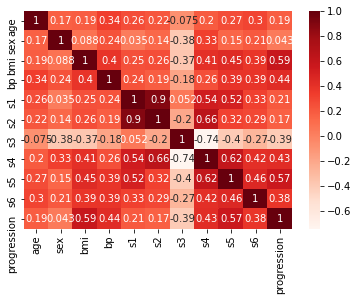

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [33]:
# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.5]
print(best_features)

In [34]:
# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [35]:
# Drop feature suggested not important in step 2
X = X.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

0.4982900996498094
0.0522686228515919


### Feature selection through feature importance (built-in tree based methods)

In the last exercise, you practiced how filter and wrapper methods could be of use when selecting features in machine learning, and in machine learning interviews. In this exercise, you'll practice feature selection methods using the built-in feature importance in tree-based machine learning algorithms on the diabetes DataFrame.

Although there is only time and space to practice with a few of them on DataCamp, there is some excellent documentation available from the scikit-learn website that goes over several other ways to select features.

In [36]:
# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.39961579 0.03085607 0.         0.00128948 0.00700339
 0.00417891 0.53899467 0.01806168]


In [37]:
# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.06006945 0.25271247 0.11231284 0.05012012 0.05404119 0.06862573
 0.07927258 0.23898234 0.08386327]


## Regularization

In the previous lesson, you covered an important aspect of machine learning interview questions by practicing various feature selection techniques.

In this exercise, you will build on your knowledge of feature selection and perform all the steps in the machine learning pipeline by trying out Lasso Regularization.

All relevant packages have been imported for you, as well as the feature matrix X and target variable y. You've come a long way!

You're now performing all of the steps in the machine learning pipeline - importing modules, preprocessing steps, instantiating estimators, train/test split, cross validating, tuning hyperparameters, then fitting, predicting and evaluating. You've come a long way!

### Lasso regularization

In [38]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train) 

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

2977.4320945626737


### Ridge regularization

In the last exercise you practiced performing lasso regularization. If you're asked about regularization techniques in a machine learning interview, know what differentiates the 2 norms. Lasso uses the L1 norm corresponding to the penalty parameter and the absolute value of the coefficients. Ridge regression performs L2 regularization, also known as L2-norm, which adds a penalty term to ordinary least squares using the penalty parameter and the sum of the squared coefficients.

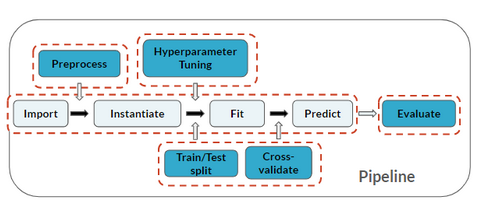

In [39]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))

3037.383332513441


## Feature engineering
In the last 2 lessons, you learned how valuable feature selection is in the context of machine learning interviews. Another set of common questions you should expect in a machine learning interview pertain to feature engineering, and how they help improve model performance.

### Logistic regression baseline classifier

In this exercise, you'll engineer a new feature on the loan_data dataset from Chapter 1, compare the accuracy score of Logistic Regression models on the dataset before and after feature engineering by comparing test labels with the predicted values of the target variable Loan Status. 

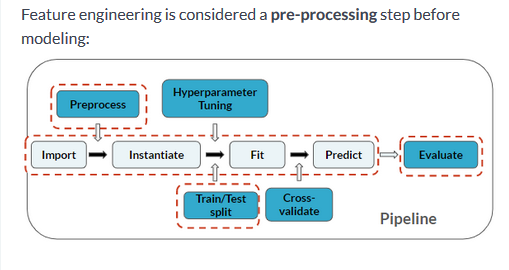

In [40]:
# Create X matrix and y array
X = loan_data_all.drop("Loan Status", axis=1)
y = loan_data_all["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic = LogisticRegression()

# Fit
logistic.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic.predict(X_test)))

0.7157800022494657


In [41]:
# Convert income: monthly_income
#loan_data_all['Annual Income'] = loan_data['Annual Income']
#loan_data_all['Monthly Debt'] = loan_data['Monthly Debt']

monthly_income = loan_data_all["Annual Income"]/12

# Make engineered feature, remove features used
loan_data_all["dti_ratio"] = loan_data_all["Monthly Debt"]/monthly_income * 100
loan_data_all = loan_data_all.drop(["Monthly Debt","Annual Income"], axis=1)

# Replace target variable levels
loan_data_all["Loan Status"] = loan_data_all["Loan Status"].replace({'FullyPaid': 0, 
                                            'ChargedOff': 1})

# One-hot encode categorical variables
loan_data_all = pd.get_dummies(data=loan_data_all)

# Print
print(loan_data_all.head())

   Current Loan Amount  Credit Score  Years in current job  \
0              12232.0         728.0                   1.0   
1              25014.0         733.0                  10.0   
2              16117.0         724.0                   9.0   
3              11716.0         740.0                   3.0   
4               9789.0         686.0                  10.0   

   Years of Credit History  Months since last delinquent  \
0                     18.0                     10.000000   
1                     26.7                     34.930232   
2                     16.7                     32.000000   
3                     10.0                     37.741130   
4                     16.7                     25.000000   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                     12.0                        0.0                  6762.0   
1                     14.0                        0.0                 35706.0   
2                     1

In [42]:
# Create X matrix and y array
X = loan_data_all.drop("Loan Status", axis=1)
y = loan_data_all["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic_dti = LogisticRegression()

# Fit
logistic_dti.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic_dti.predict(X_test)))

0.7183668878641323


### Bootstrap aggregation (bagging)

In the last lesson, you got a small taste of classification models by applying logistic regression on data with engineered features. In machine learning interviews, it's sometimes worthwhile to know about ensemble models since they combine weak learners to create a strong learner that improves model accuracy.

In this exercise, you will start off by applying a bagging classifier which uses a sampling technique, with replacement, to maintain randomness and reduce overfitting. You will be using functions from the sklearn.ensemble module which you saw in the video exercise.

In [43]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(X_train, y_train)

# Predict
bagged_pred = bagged_model.predict(X_test)

# Print accuracy score
print(accuracy_score(y_true=y_test, y_pred=bagged_pred))

0.7210287556705283


### Boosting

In the last exercise, you started off with ensemble techniques by using bagging. In a machine learning interview, you might be prompted to try out or discuss more than one ensemble technique.

Here, you'll practice Boosting which uses all data to train each learner, but instances that were misclassified by the previous learners are given more weight so that subsequent learners give more focus to them during training. This results in a model with decreased bias.

#### Ada boosting

In [44]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_fit = boosted_model.fit(X_train, y_train)

# Predict
boosted_pred = boosted_model.predict(X_test)

# Print model accuracy
print(accuracy_score(y_true=y_test, y_pred=boosted_pred))

0.7314512803209238


#### XGBoost

In [45]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb_fit = xgb.fit(X_train, y_train)

# Predict
xgb_pred = xgb.predict(X_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(y_test, xgb_pred))

[12:24:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Final prediction score: [0.73077644]


# Chapter 3 :: Unsupervised learning

## PCA - Principal component analysis (dimensionality reduction)

In the last 2 chapters, you saw various instances about how to reduce the dimensionality of your dataset including regularization and feature selection. It is important to be able to explain different aspects of reducing dimensionality in a machine learning interview. Large datasets take a long time to compute, and noise in your data can bias your results.

One way of reducing dimensionality is principal component analysis. It's an effective way of reducing the size of the data by creating new features that preserve the most useful information on a dataset while at the same time removing multicollinearity. In this exercise, you will be using the sklearn.decomposition module to perform PCA on the features of the diabetes dataset while isolating the target variable progression.

This is where you are in the pipeline:

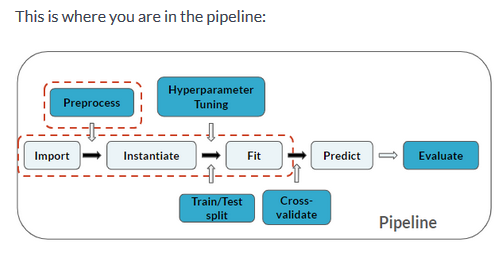

In [46]:
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# PCA
pca = PCA(n_components=3)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


## SVD Singular value decomposition - dimensionality reduction 

In the last exercise, you saw how useful PCA could be in reducing the dimensions of a dataset when you're given a question about high dimensionality in a machine learning interview.

In this exercise, you'll practice SVD on the diabetes. This particular transformer can work with sparse matrices efficiently, as opposed to PCA, and performs linear dimensionality reductions by way of truncated singular value decomposition.

Recall that singular value decomposition takes the original data matrix, decomposes it into three matrices and uses them to calculate and return singular values.

In [47]:
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# SVD
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


## Visualization separation of classes with PCA I

A common question you may receive in a machine learning interview is visualizing dimensionality after PCA. In this exercise, you will do just that by plotting the first 2 principal components of loan_data in order to visualize the class separation between both components on whether the loan status has been fully paid or charged off.

The loan_data dataset has been scaled and one-hot encoded, meaning categorical variables were turned into binary indicators, since features should be on the same scale as well as numeric prior to PCA.

A PCA model with 2 PCs and setting up a plot with x and y labels and title has already been taken care of for you. You'll use a DataFrame called loan_data_PCA in the exercises. The possible values for the target variable Loan Status are 0 and 1. You'll be plotting PC1 on the x-axis and PC2 on the y-axis.

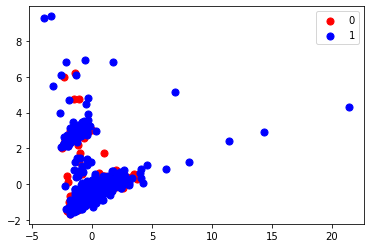

In [51]:
targets = [0, 1]
colors = ['r', 'b']

# For loop to create plot
for target, color in zip(targets,colors):
    indicesToKeep = loan_data_PCA['Loan_Status'] == target
    # ax.Axes
    plt.scatter(loan_data_PCA.loc[indicesToKeep, 'principal_component_1'], 
                    loan_data_PCA.loc[indicesToKeep, 'principal_component_2'],
                    c = color, s = 50)
    

# Legend    
#ax.legend(targets)
#ax.grid()
plt.legend(targets)
plt.show()

## Visualization PCs with a scree plot

In a machine learning interview, you may be asked what is the optimum number of features to keep. In this exercise you'll create a scree plot and a cumulative explained variance ratio plot of the principal components using PCA on loan_data. This will help inform the optimal number of PCs for training a more accurate ML model going forward.

Since PCA is an unsupervised method, that means principal component analysis is performed on the X matrix having removed the target variable Loan Status from the dataset. Not setting n_components returns all the principal components from the trained model.

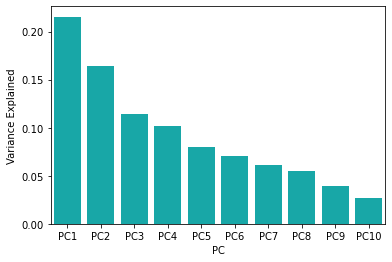

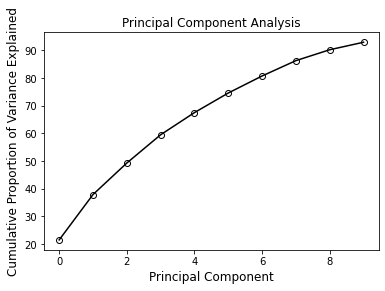

In [52]:
# Remove target variable
X = loan_data_dr.drop('Loan_Status', axis=1)

# Instantiate
pca = PCA(n_components=10)

# Fit and transform
principalComponents = pca.fit_transform(X)

# List principal components names
principal_components = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

# Create a DataFrame
pca_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,
             'PC':principal_components})

# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.show()

# Instantiate, fit and transform
pca2 = PCA()
principalComponents2 = pca2.fit_transform(X)

# Assign variance explained
var = pca.explained_variance_ratio_

# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

## K-means clustering (clustering)

When comparing different clustering algorithms, you must make sure they are comparable by assessing the same distance metric between them, not different distance metrics.

In a machine learning interview setting, you might be asked how the output from K-means clustering might be used to assess its performance as the best algorithm.

In this exercise you'll practice K-means clustering. Using the .inertia_ attribute to compare models with different numbers of clusters, k, you'll then also use this information to assess cluster number in the next exercise.

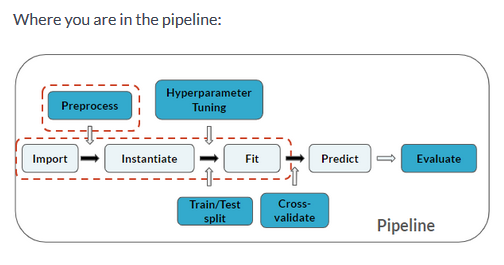

In [53]:
# Create feature matrix
X = diabetes.drop("progression", axis=1)

# Instantiate
kmeans = KMeans(n_clusters=2, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 2 clusters is", kmeans.inertia_)

# Instantiate
kmeans = KMeans(n_clusters=5, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 5 clusters is", kmeans.inertia_)

# Instantiate
kmeans = KMeans(n_clusters=10, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 10 clusters is", kmeans.inertia_)

# Instantiate
kmeans = KMeans(n_clusters=20, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 20 clusters is", kmeans.inertia_)

Sum of squared distances for 2 clusters is 7.187000018583659
Sum of squared distances for 5 clusters is 5.554329928878418
Sum of squared distances for 10 clusters is 4.372481384200357
Sum of squared distances for 20 clusters is 3.5055589350791236


## Hierarchical agglomerative clustering (clustering)

In the last exercise, you saw how the number of clusters while performing K-means clustering could impact your results allowing you to discuss K-means in a machine learning interview. However, another clustering model you can use is hierarchical agglomerative clustering. In Python, you could derive the optimal number of clusters for this technique both visually and mathematically. You will the scipy and sklearn modules to do both.

Recall that selecting the optimal number of clusters from a dendrogram depends on both the linkage criteria and distance threshold. Here, you'll create a dendrogram with the X matrix from diabetes, then extend an imaginary line at length 1.50, counting the number of vertical lines crossed to represent the optimal number of clusters for your hierarchical clustering algorithm going forward.

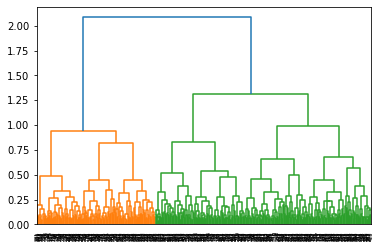

In [54]:
# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

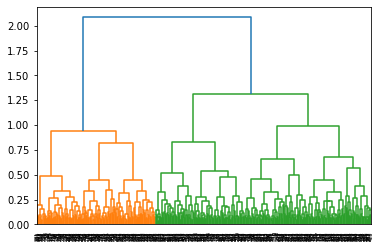

2


In [55]:
# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X)

# Print number of clusters
print(hc.n_clusters)

## Choosing the optimal number of clusters (clustering)

It's best to try both the elbow and silhouette methods on a given dataset to ensure their results are the same.

### Silhouette method

In the last lesson, you got a taste of how different numbers of clusters affects the performance of your K-Means algorithm. This is especially poignant in the context of an interview, as the optimal number of clusters generates the best results.

In this exercise, you will be using the silhoutte_score() function from sklearn.metrics on K-means algorithms ran on the diabetes DataFrame in order to perform the Silhouette method for finding the optimal number of clusters. Note you will be using euclidian distance when calculating the score as it ensures comparability between it and the Elbow method. 

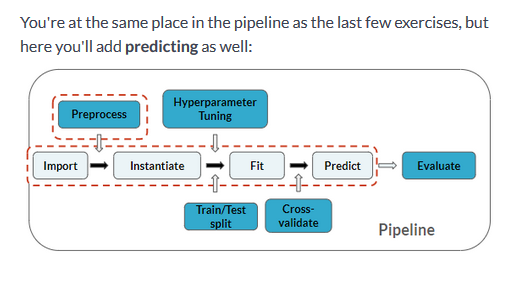

In [56]:
# Feature matrix
X = diabetes.drop("progression", axis=1)

# For loop
for n_clusters in range(2,9):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.23698717031681765)
For n_clusters = 3, silhouette score is 0.15350479626184949)
For n_clusters = 4, silhouette score is 0.1401313826395936)
For n_clusters = 5, silhouette score is 0.14771989806881036)
For n_clusters = 6, silhouette score is 0.1446123683119412)
For n_clusters = 7, silhouette score is 0.13795795694681365)
For n_clusters = 8, silhouette score is 0.13817225979139225)


### Elbow method

The silhouette score and elbow methods provide validation to the results you see from each. In a machine learning interview setting, you may get asked about one or the other but discussing the specifics of one in the context of the other would contribute greatly to your answer.

In this exercise, for each k value, you will initialize a K-means model and use the inertia_ attribute to identify the sum of squared distances of samples to the nearest cluster center that, when plotted, appears to be an 'elbow' in the plot.

Recall in the last lesson that as the value of k increased, the value for inertia_ decreased.

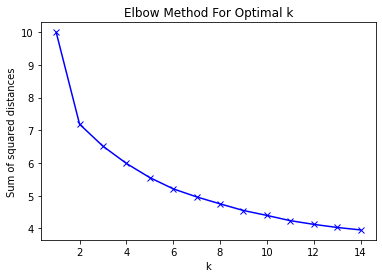

In [57]:
# Create empty list
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# CHAPTER 4 :: Model generalization: bootstrapping and cross-validation

## Decision Tree model

A Decision Tree model is unfortunately a greedy algorithm, not guaranteed to return the optimal tree whether or not it's cross-validated. You're better off to combine cross-validation with a bootstrap method.
Decision tree

In the last three chapters, you've learned a range of techniques that help you tackle many aspects of the machine learning interview. In this chapter, you'll be introduced to various ways to make sure any model you're asked to create or discuss in a machine learning interview is generalizable, evaluated correctly, and properly selected from among other possible models.

In this exercise, you will delve into hyperparameter tuning for a decision tree on the loan_data dataset. Here you'll tune min_samples_split, which is the minimum number of samples required to create an additional binary split, and max_depth, which is how deep you want to grow the tree. The deeper a tree, the more splits and therefore captures more information about the data.

The feature matrix X and the target label y have been imported for you.

Note that you're once again performing all of the steps in the machine learning pipeline!

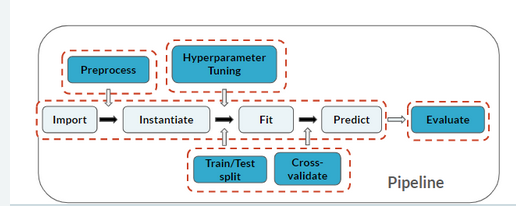

In [58]:
X = loan_data_md.drop("Loan_Status", axis=1)
y = loan_data_md[["Loan_Status"]]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_clf = DecisionTreeClassifier() 
loans_clf.fit(X_train, y_train)
y_pred = loans_clf.predict(X_test)

# Evaluation metric
print("Decision Tree Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Decision Tree Accuracy: 0.6


In [59]:
# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10]}

# Instantiate classifier and GridSearchCV, fit
loans_clf = DecisionTreeClassifier()
dtree_cv = GridSearchCV(loans_clf, param_grid, cv=5)
fit = dtree_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(dtree_cv.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(dtree_cv.best_score_))

Tuned Decision Tree Parameter: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.7


## Random Forest model
A forest of decision trees

For this exercise, you'll practice using the bootstrapped Decision Tree, otherwise known as the Random Forest. As you did in the previous exercise, you'll then compare its accuracy to a model where you've tuned hyperparameters with cross-validation.

This time, you'll tune an additional hyperparameter, max_features, which lets your model decide how many features to use. When it is not set specifically, then it defaults to auto. Something to keep in mind for an interview is that Decision Trees consider all features by default, whereas Random Forests usually consider the square root of the number of features.

In [60]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_rf = RandomForestClassifier() 
loans_rf.fit(X_train, y_train)
y_pred = loans_rf.predict(X_test)

# Evaluation metric
print("Random Forest Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Random Forest Accuracy: 0.7133333333333334


In [61]:
# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10],"max_features": [10, 20, 25]}

# Instantiate classifier and GridSearchCV, fit
loans_rf = RandomForestClassifier()
rf_cv = GridSearchCV(loans_rf, param_grid, cv=5)
fit = rf_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(rf_cv.best_score_))

Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 2, 'max_features': 10, 'min_samples_split': 2}
Tuned Random Forest Accuracy: 0.7185714285714286


## Model evaluation: imbalanced classes

A low precision score indicates that there are too many false positives, bringing the calculation down. Seeking to reduce the number of false positives to increase the precision can be accomplished with trying different classification algorithms and/or resampling techniques.

Imbalanced class metrics

Class imbalance is something that can hamper your model's performance in any machine learning context. This is especially relevant in a machine learning interview if you are asked what to do if you are given a dataset with an imbalanced class, as some data is imbalanced by design such as insurance fraud data.

In this exercise you'll use sklearn to create a logistic regression model and print the confusion matrix along with several evaluation metrics to get a better understanding of how to interpret Machine Learning models from datasets that have a class imbalance.

Recall the class imbalance you saw previously in loan_data. The number of observations with Loan Status of Fully Paid far outweighs those that are Charged Off:

In [62]:
# Instantiate, fit, predict
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Instantiate, fit, predict
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("F1: {}".format(f1_score(y_test, y_pred)))

Confusion matrix:
 [[  8  76]
 [ 11 205]]
Accuracy: 0.71
Precision: 0.7295373665480427
Recall: 0.9490740740740741
F1: 0.8249496981891349


### Resampling techniques

In the last exercise, you saw how class imbalance can impact the results of your confusion matrix. In this exercise, you'll practice resampling techniques to explore the different results that alternative resampling styles can have on a dataset with class imbalance like that seen with loan_data. Using sklearn's resample() function, matching the number of rows in the majority class is called upsampling, while matching the number of rows in the minority class is called downsampling.

You will create both an upsampled and downsampled version of the loan_data dataset, apply a logistic regression on both of them and then evaluate your performance. The training data and its labels that correspond to deny are subset to contain only the minority class and to approve that correspond to the majority.

A train/test split testing object for making predictions has been saved to the workspace as X_test for your use in the exercises.

In [63]:
# ERROR :: deny, approve should be created 

# Upsample minority and combine with majority
loans_upsampled = resample(deny, replace=True, n_samples=len(approve), random_state=123)
upsampled = pd.concat([approve, loans_upsampled])

# Downsample majority and combine with minority
loans_downsampled = resample(approve, replace = False,  n_samples = len(deny), random_state = 123)
downsampled = pd.concat([loans_downsampled, deny])

# Upsampled feature matrix and target array
X_train_up = upsampled.drop('Loan Status', axis=1)
y_train_up = upsampled['Loan Status']

# Instantiate, fit, predict
loan_lr_up = LogisticRegression(solver='liblinear')
loan_lr_up.fit(X_target, y_target)
upsampled_y_pred = loan_lr_up.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("F1: {}".format(f1_score(y_test, y_pred)))

# Downsampled feature matrix and target array
X_train_down = downsampled.drop('Loan Status', axis=1)
y_train_down = downsampled['Loan Status']

# Instantiate, fit, predict
loan_lr_down = LogisticRegression(solver='liblinear')
loan_lr_down.fit(X_train_down, y_train_down)
downsampled_y_pred = loan_lr_down.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, downsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, downsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, downsampled_y_pred)))
print("Recall: {}".format(recall(y_test, downsampled_y_pred)))
print("F1: {}".format(f1_score(y_test, downsampled_y_pred)))

NameError: name 'deny' is not defined

## Multicollinearity techniques - feature engineering

Multicollinearity is a common issue that might affect your performance in any machine learning context. Knowing how to discuss this small detail could take your explanation of modeling from good to great and really set you apart in an interview.

In this exercise, you'll practice creating a baseline model using Linear Regression on the diabetes dataset and explore some of the output metrics. Then you'll practice techniques to visually explore the correlation between the independent variables before finally perform feature engineering on 2 variables that are highly correlated. 

In [64]:
# Instantiate, fit, predict
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
y_pred = lin_mod.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lin_mod.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[-2.14621682e-02  1.00697685e-02  1.15051908e-02  2.70552602e-03
  -1.74266017e-02  4.69433702e-02  6.97629949e-03  1.93664242e-02
  -4.89581397e-02 -2.57630578e-02 -9.01857118e-02  9.01857118e-02
   6.48210820e-02 -2.50215394e-02 -3.97995426e-02 -2.40715468e-01
  -1.91640881e-01 -3.33066907e-16 -1.84081840e-01  3.44924570e-02
  -9.68401802e-02 -9.25000717e-01 -2.69191420e-01  0.00000000e+00
  -4.62462488e-01  8.97383730e-02]]
Mean squared error: 0.20
R_squared score: 0.02


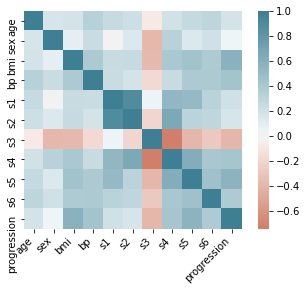

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

In [65]:
# Correlation matrix
diab_corr = diabetes.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corr, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corr)

In [66]:
# Feature engineering
diabetes['s1_s2'] = diabetes['s1'] * diabetes['s2']
diabetes = diabetes.drop(['s1','s2'], axis=1)

# Print variable names
print(diabetes.columns)

# Train/test split
X2 = diabetes.drop('progression', axis=1)
y2 = diabetes['progression']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

Index(['age', 'sex', 'bmi', 'bp', 's3', 's4', 's5', 's6', 'progression',
       's1_s2'],
      dtype='object')


In [67]:
# Instantiate, fit, predict
lin_mod2 = LinearRegression()
lin_mod2.fit(X_train2, y_train2)
y_pred2 = lin_mod2.predict(X_test2)

# Coefficient estimates
print('Coefficients: \n', lin_mod2.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test2, y_pred2))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test2, y_pred2))

Coefficients: 
 [  -2.33325625 -250.45569362  541.16674251  260.86592129 -338.13983816
  -47.01999461  430.98561453   94.21041896 -283.69973876]
Mean squared error: 2910.42
R_squared score: 0.51


## Multicollinearity techniques - PCA

In the last exercise you used feature engineering to combine the s1 and s2 independent variables as s1_s2 since they displayed the highest correlation in the diabetes dataset.

In this exercise, you'll perform PCA on diabetes to remove multicollinearity before you apply Linear Regression to it. Then, you'll compare the output metrics to those from the last exercise. Finally, you'll visualize what the correlation matrix and heatmap of the dataset looks like since PCA completely removes multicollinearity.

In [68]:
# Instantiate, fit, predict
LinRegr = LinearRegression()
LinRegr.fit(X_trainPCA, y_train)
predictions = LinRegr.predict(X_testPCA)

# The coefficients
print('Coefficients: \n', LinRegr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

NameError: name 'X_trainPCA' is not defined

In [ ]:
# Correlation matrix
X_trainPCA = pd.DataFrame(X_trainPCA)
diab_corrPCA = X_trainPCA.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corrPCA, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corrPCA)

## Model selection :: Random forest ensemble

Questions about ensemble models are common in a machine learning interview. If you're provided with a dataset and asked to build a highly accurate model, you will likely want to consider these more complex models.

Your challenge in the remainder of this last lesson in the course is to create and compare two different ensemble models for loan_data. 

In [69]:
# Instantiate, fit, predict

X = loan_data_en.drop('Loan_Status', axis=1)
y = loan_data_en['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)


rf_model = RandomForestClassifier(n_estimators=50, random_state=123, oob_score = True)
rf_fit = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Random Forest Accuracy: {}".format(accuracy_score(y_test, rf_pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, rf_pred)))
print("Precision: {}".format(precision_score(y_test, rf_pred)))
print("Recall: {}".format(recall_score(y_test, rf_pred)))
print("F1: {}".format(f1_score(y_test, rf_pred)))

Random Forest Accuracy: 0.71
Confusion matrix:
 [[ 17  67]
 [ 20 196]]
Precision: 0.7452471482889734
Recall: 0.9074074074074074
F1: 0.8183716075156575


## Model selection :: Gradient boosting ensemble

Boosting is a technique where the error of one predictor is passed as input to the next in a sequential manner. Gradient Boosting uses a gradient descent procedure to minimize the log loss for each subsequent classification tree added one at a time that, on their own, are weak decision models. Gradient Boosting for regression is similar, but uses a loss function such as mean squared error applied to gradient descent.

In this exercise, you will create a Gradient Boosting Classifier model and compare its performance to the Random Forest from the previous exercise, which had an accuracy score of 72.5%.

In [70]:
# Instantiate, fit, predict
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01,random_state=123)
gb_fit = gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Print evaluation metrics
print("Gradient Boosting Accuracy: {}".format(accuracy_score(y_test, gb_pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, gb_pred)))
print("Precision: {}".format(precision_score(y_test, gb_pred)))
print("Recall: {}".format(recall_score(y_test, gb_pred)))
print("F1: {}".format(f1_score(y_test, gb_pred)))

Gradient Boosting Accuracy: 0.7133333333333334
Confusion matrix:
 [[  0  84]
 [  2 214]]
Precision: 0.7181208053691275
Recall: 0.9907407407407407
F1: 0.8326848249027237
